In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
x1 = np.arange(1,11)
x = x1.reshape(-1,1)
y = []
for i in range(10):
    a = random.randrange(1,10)
    y.append(a)
#랜덤한 10개의 정수리스트(y) 생성

In [15]:
print(y)

[5, 8, 5, 4, 4, 1, 4, 8, 5, 2]


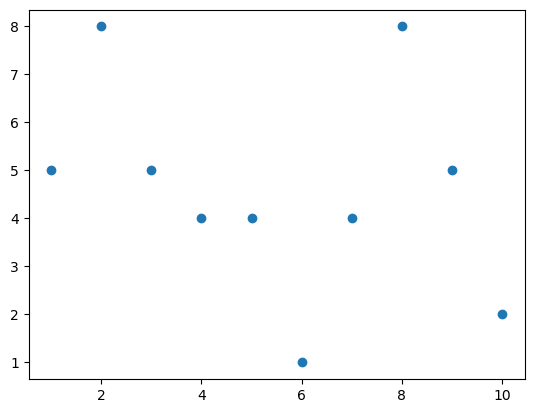

In [16]:
plt.scatter(x, y)

In [17]:
knn_re = KNeighborsRegressor(n_neighbors=2).fit(x,y)
print(knn_re.predict([[7]]))

[2.5]


In [18]:
from sklearn import neighbors

In [23]:
np.random.seed(0)
X = np.sort(5*np.random.rand(40,1), axis=0)
T = np.linspace(0,5,500)[:,np.newaxis]
#np.linspace(a,b,c) -> a,b를 양끝으로 하여 c개의 숫자로 채움
y = np.sin(X).ravel()
#np.ravel() -> 다차원 배열을 평평하게 작업

y[::5] += 1*(0.5-np.random.rand(8))

40

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

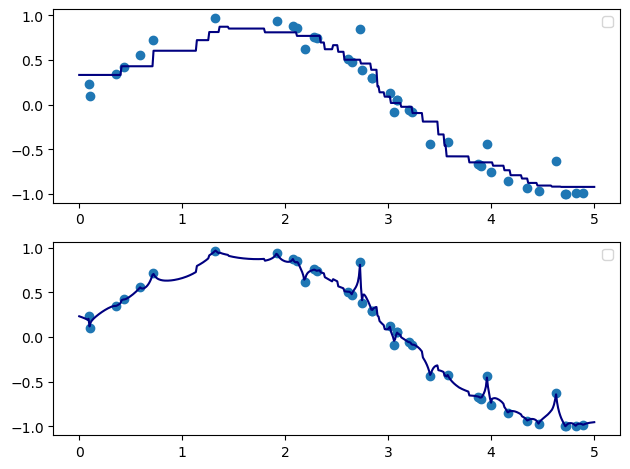

In [24]:
n_neighbors = 5
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_r = knn.fit(X,y).predict(T)
    
    plt.subplot(2,1,i+1)
    plt.scatter(X,y)
    plt.plot(T,y_r, color="navy")
    plt.axis("tight")
    plt.legend()

plt.tight_layout()
plt.show

#거리의 가중치를 주었을 때 예측값의 정밀도가 높아지는 것을 확인할 수 있음

In [29]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 컬럼 설명

        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

In [34]:
data = df[['HouseAge', 'Population', 'AveRooms']]
target = df[['target']]

In [35]:
x_train, x_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3, random_state = 111)

In [41]:
rmse_val=[]
for K in range(200):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, Y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(Y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)

Rmse  1 = 1.545852879836726
Rmse  2 = 1.3404803628792816
Rmse  3 = 1.280622343700965
Rmse  4 = 1.2475057259101532
Rmse  5 = 1.2234163729791199
Rmse  6 = 1.2081221289223156
Rmse  7 = 1.1962994784332441
Rmse  8 = 1.1896370679591675
Rmse  9 = 1.1841865230073456
Rmse  10 = 1.1795945505065981
Rmse  11 = 1.179376564110147
Rmse  12 = 1.177547387908864
Rmse  13 = 1.1760410131487673
Rmse  14 = 1.1745092105421275
Rmse  15 = 1.1737259874718884
Rmse  16 = 1.1712151616045188
Rmse  17 = 1.1703878238783354
Rmse  18 = 1.1696189828009766
Rmse  19 = 1.1689556101023468
Rmse  20 = 1.1679710183912013
Rmse  21 = 1.166528916584005
Rmse  22 = 1.1649752539404366
Rmse  23 = 1.1642668339144544
Rmse  24 = 1.1623137712638951
Rmse  25 = 1.163035636875919
Rmse  26 = 1.162603083763324
Rmse  27 = 1.1623144364620757
Rmse  28 = 1.1622178493593671
Rmse  29 = 1.1617197380842859
Rmse  30 = 1.1609536891667498
Rmse  31 = 1.1605622526704784
Rmse  32 = 1.1595772700111975
Rmse  33 = 1.158756412688002
Rmse  34 = 1.15814797387093

<Axes: >

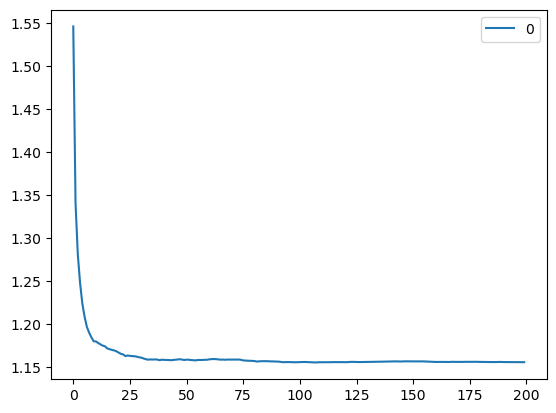

In [42]:
curve_1 = pd.DataFrame(rmse_val)
curve_1.plot()
#이웃수를 증가시키면서 RMSE 값을 확인한 결과 25개의 이웃 이상에서는 거의 수렴하는 결과를 확인할 수 있음